In [43]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as sps
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt
%matplotlib inline

Загрузим данные.

In [27]:
data = pd.read_csv("vowel-context.data", sep=" ", header=None)
data = data[7].values
print data.shape[0], "- размер выборки"

990 - размер выборки


Построим гистограмму и QQ-plot.

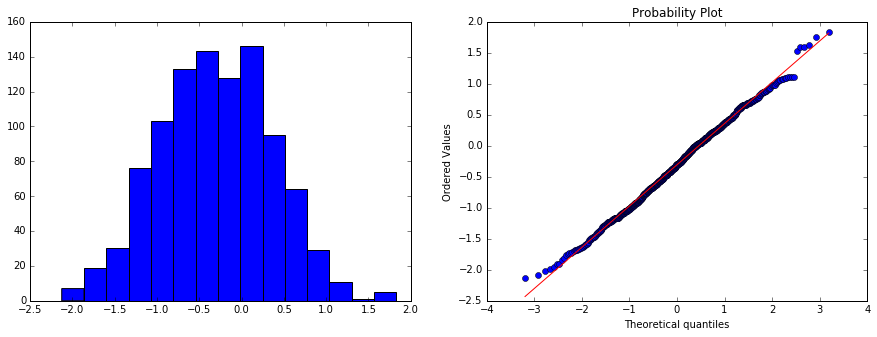

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
_ = plt.hist(data, bins=15)
plt.subplot(122)
_ = scipy.stats.probplot(data, plot=plt, dist="norm")

Гистограмма похожа на гистограмму нормального распределения и на qq-plot видим лишь небольшие отклонения на краях, поэтому проверим гипотезу о нормальности распределения, ожидая высокий p-value.

Воспользуемся критерием Шапиро-Уилка проверки гипотезы о нормальности распределения.

In [38]:
W, p_value = sps.shapiro(data)
print "statistic W={}, p-value={}".format(W, p_value)

statistic W=0.997102916241, p-value=0.070861928165


Итак, p-value > 0.07 - не отклоняем гипотезу на уровне значимости 0.07. Т.о. можем считать, что выборка из нормального распределения, осталось определить параметры распределения. Для этого достаточно посчитать среднее и стандартное отклонение.

In [31]:
mean = data.mean()
std = data.std()
print "Среднее: {}, стандартное отклонение: {}".format(mean, std)

Среднее: -0.305657575758, стандартное отклонение: 0.664266518039


Для пущей уверенности проверим гипотезу о том, что выборка из нормального распределения с вычисленными параметрами. Для этого воспользуемся критерием Колмогорова-Смирнова.

KstestResult(statistic=0.027219861607373219, pvalue=0.45296660263978694)


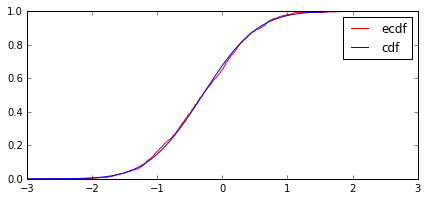

In [55]:
print(sps.kstest(data, "norm", (mean, std)))

ecdf = ECDF(data)
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(7, 3))
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.plot(grid, sps.norm.cdf(grid, mean, std), color='blue', label='cdf')
plt.legend()
plt.show()

Гипотеза не отклоняется на уровне значимости 0.45.

Итак, заключаем, что выборка из распределния $\mathcal{N}(-0.31, 0.66)$